In [1]:
%load_ext autoreload
%autoreload 2

from f1analytics.vizHelper import vizTemplates
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import fastf1

In [2]:
imolagp_p3=fastf1.get_session(2024, 'imola', 'fp3')
imolagp_p2=fastf1.get_session(2024, 'imola', 'fp2')
imolagp_p1=fastf1.get_session(2024, 'imola', 'fp1')
imolagp_q=fastf1.get_session(2024, 'imola', 'q')
imolagp_r=fastf1.get_session(2024, 'imola', 'r')

imolagp_p3.load()
imolagp_p2.load()
imolagp_p1.load()
imolagp_q.load()
imolagp_r.load()

In [3]:
imolagp_p3Viz=vizTemplates.vizDataQuali(imolagp_p3)
imolagp_qViz=vizTemplates.vizDataQuali(imolagp_q)
imolagp_rViz=vizTemplates.vizDataRace(imolagp_r)

getting and enriching fastest laps telemetry...
getting and enriching all laps telemetry...
getting and enriching fastest laps telemetry...


f:\f1analytics\.venv\lib\site-packages\fastf1\core.py:3063: FutureWarning: In the future, `None` will be returned instead of an empty `Lap` object when there are no laps that satisfy the definition for fastest lap.
  warnings.warn(("In the future, `None` will be returned instead of "


getting and enriching all laps telemetry...
getting and enriching fastest laps telemetry...
getting and enriching all laps telemetry...


F:\f1analytics\src\f1analytics\vizHelper\vizTemplates.py:303: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  tyreAlphas = pd.concat(


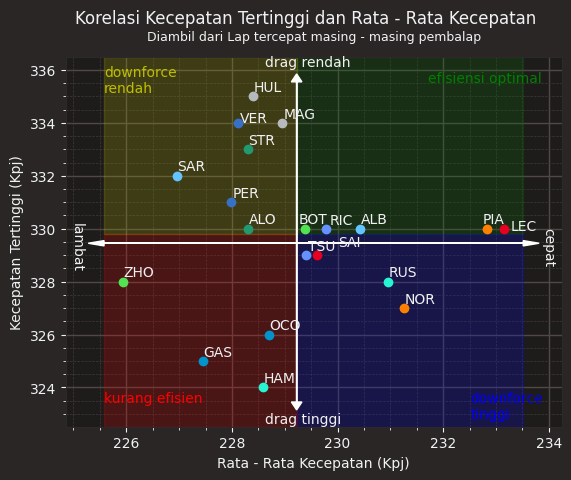

In [4]:
imolagp_p3Viz.quadrantAnalysis()

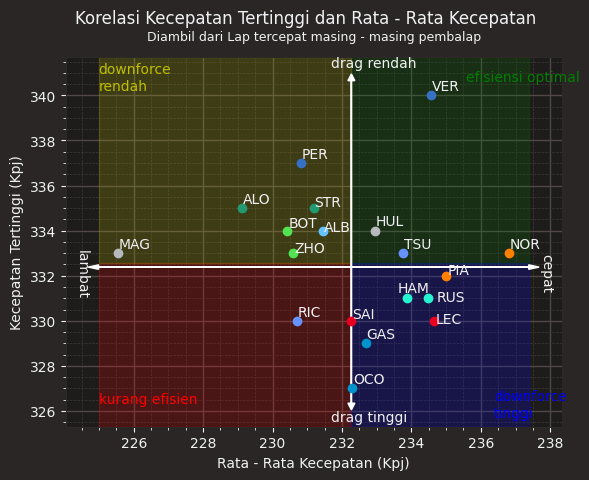

In [5]:
imolagp_qViz.quadrantAnalysis()

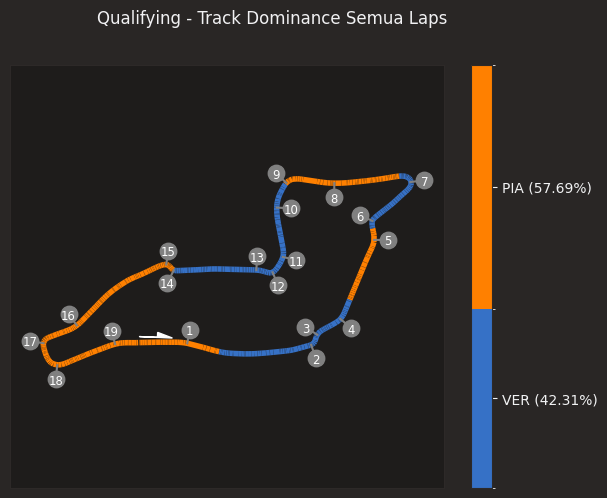

In [10]:
imolagp_qViz.trackDominance(900,-40,['VER','PIA'],mode='average')

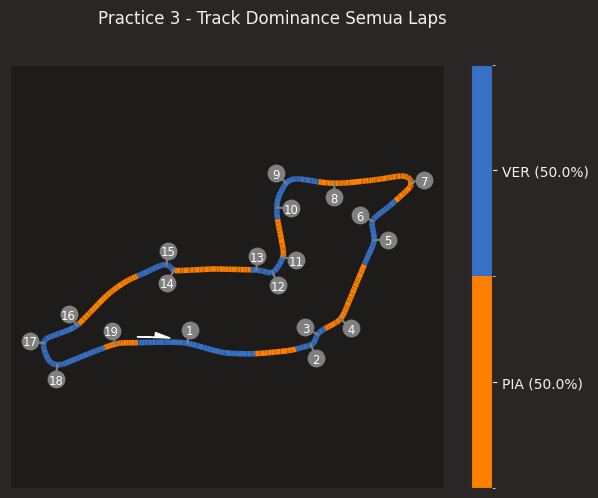

In [14]:
imolagp_p3Viz.trackDominance(900,-40,['VER','PIA'])

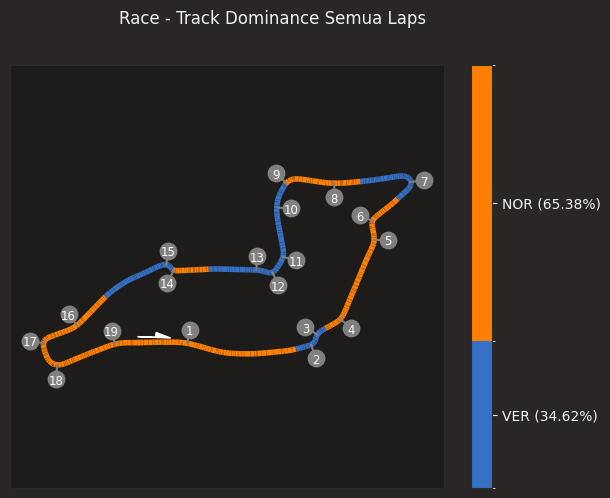

In [11]:
imolagp_rViz.trackDominance(900,-40,['VER','NOR'],mode='average')

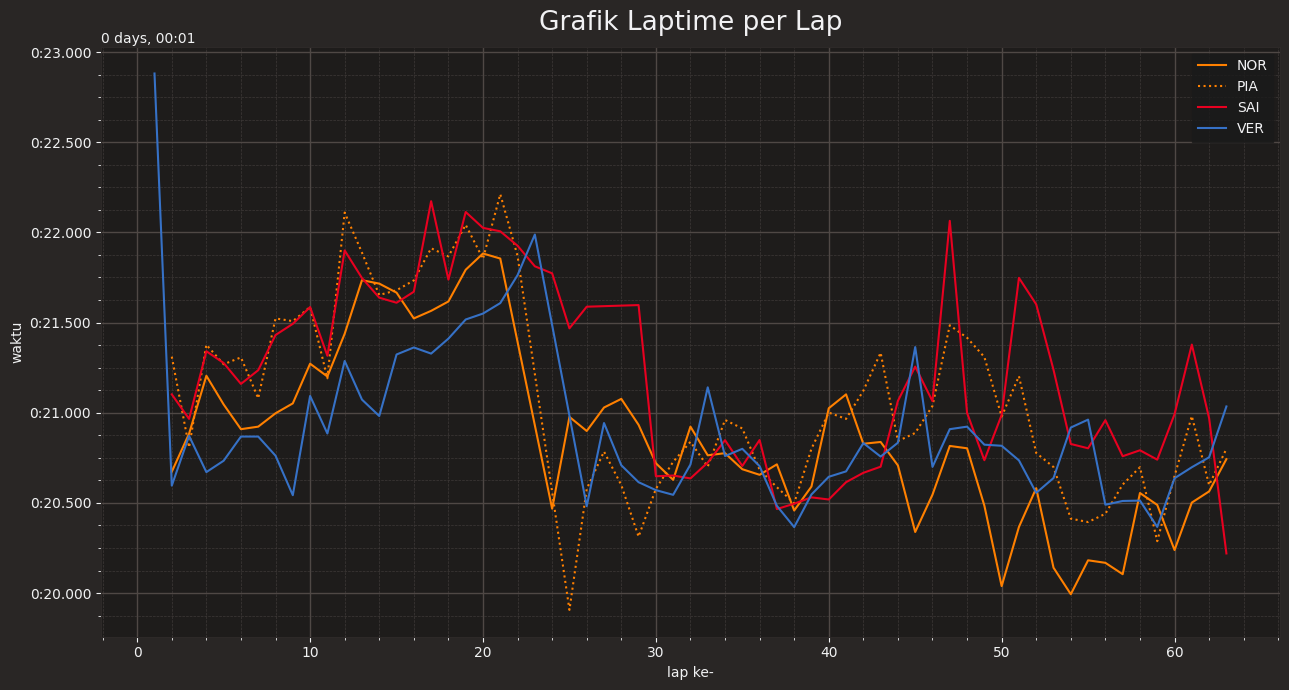

In [11]:
imolagp_rViz.LinePlot(['PIA','SAI','NOR','VER'],23)

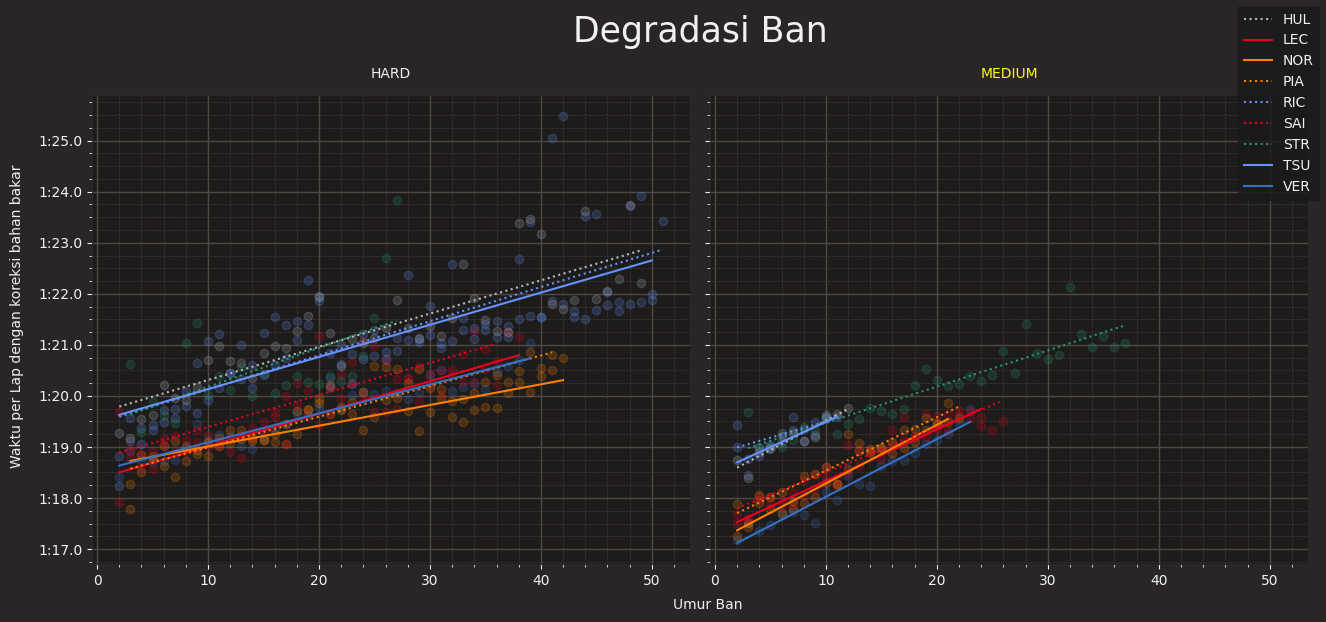

In [26]:
imolagp_rViz.TyreDeg(['VER','SAI','LEC','NOR','PIA','STR','TSU','RIC','HUL'])

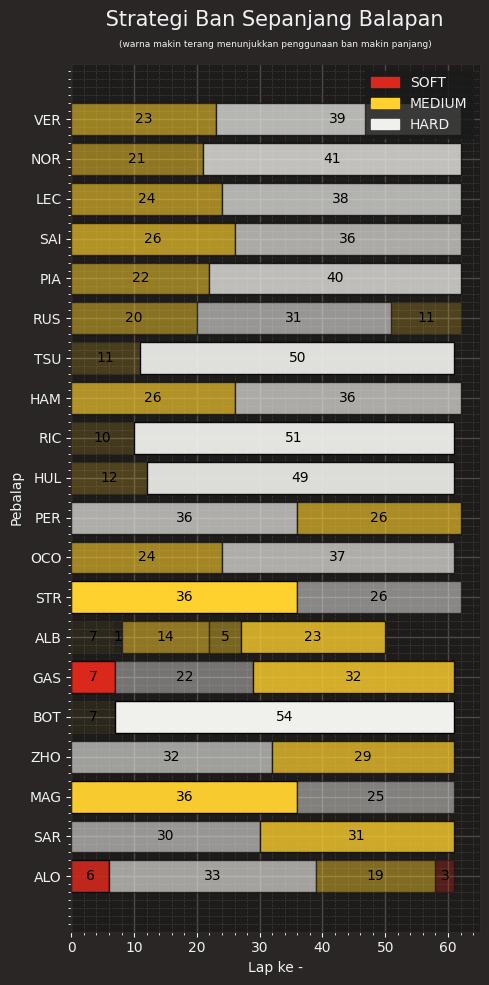

In [25]:
imolagp_rViz.TyreStrats()

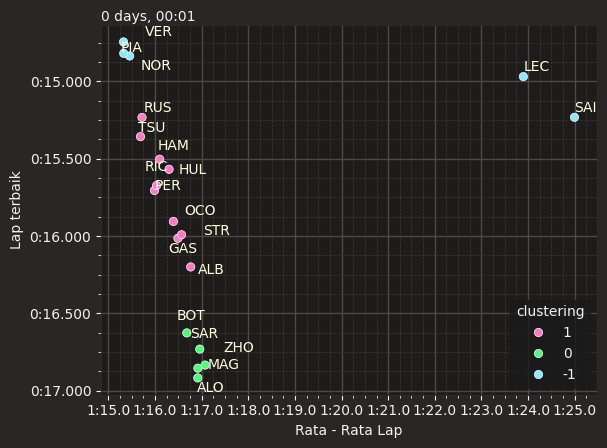

In [29]:
imolagp_qViz.clusterAnalysis()

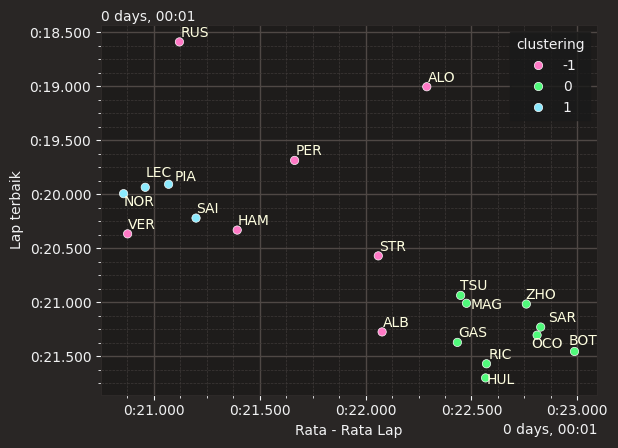

In [30]:
imolagp_rViz.clusterAnalysis()

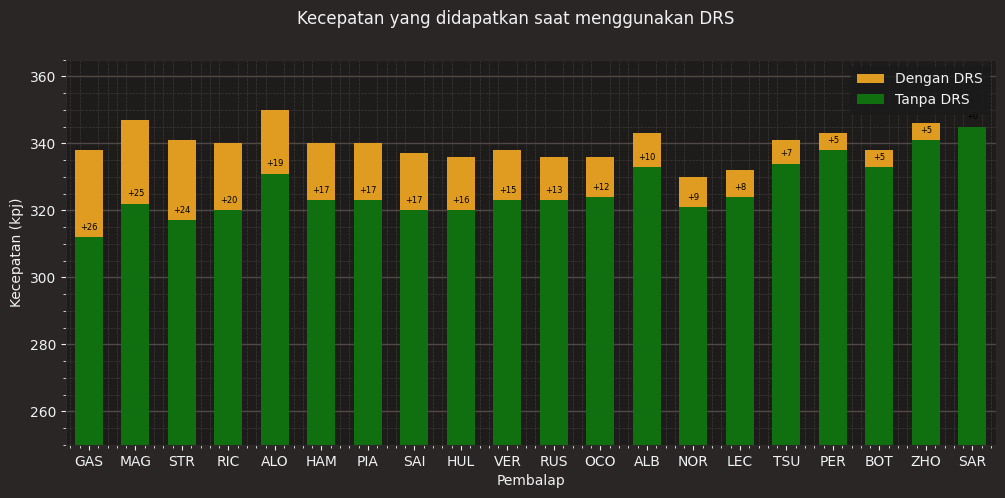

In [31]:
imolagp_rViz.drsGain()

f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\f1analytics\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 27.9% of the points cannot be placed; y

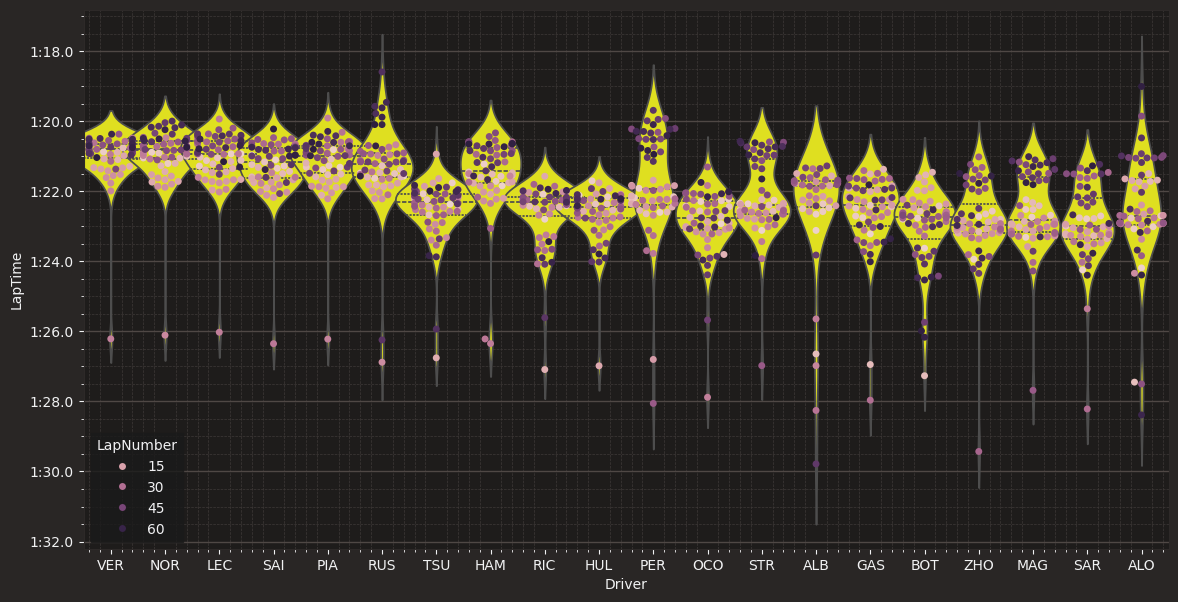

In [32]:
imolagp_rViz.violin()

In [6]:
dfdrv=pd.read_csv(r'..\..\data\interim\f1tfeed\2024_imola\drivers_racing.csv').merge(pd.read_csv(r'..\..\data\interim\f1tfeed\2024_imola\driver_details_this_racing.csv'))
dfdrv=dfdrv.merge(pd.read_csv(r'..\..\data\interim\f1tfeed\2024_imola\teams_racing.csv'),right_on='team', left_on='team_name').drop('team_name_x',axis=1).rename(columns={'team_name_y':'team_name'})
dfdrv['primary_color']=dfdrv['primary_color'].str.replace('"','')
dfdrv['secondary_color']=dfdrv['secondary_color'].str.replace('"','')
dfdrv['team_name']=dfdrv['team_name'].str.replace('"','')
dfdrv

,driver_name,driver_id,last_name,abbreviation,driver_num,starting_position,pts_accumulated,team,team_name,primary_color,secondary_color
0,M.VERSTAPPEN,d_01,Verstappen,VST,1,1,136.0,redbull,Red Bull,#1a00cf,#1a00cf
1,S.PEREZ,d_02,Perez,PER,11,11,103.0,redbull,Red Bull,#1a00cf,#1a00cf
2,C.SAINZ,d_03,Sainz,SAI,55,4,83.0,ferrari,Ferrari,#eb1e25,#eb1e25
3,C.LECLERC,d_04,Leclerc,LEC,16,3,98.0,ferrari,Ferrari,#eb1e25,#eb1e25
4,L.HAMILTON,d_05,Hamilton,HAM,44,8,27.0,mercedes,Mercedes,#0CA597,#0CA597
5,G.RUSSELL,d_06,Russell,RUS,63,6,37.0,mercedes,Mercedes,#0CA597,#0CA597
6,E.OCON,d_07,Ocon,OCO,31,12,1.0,alpine,Alpine,#2885b7,#2885b7
7,P.GASLY,d_08,Gasly,GAS,10,15,0.0,alpine,Alpine,#2885b7,#2885b7
8,L.NORRIS,d_09,Norris,NOR,4,2,83.0,mclaren,McLaren,#f2a30e,#f2a30e
9,O.PIASTRI,d_10,Piastri,PIA,81,5,41.0,mclaren,McLaren,#f2a30e,#f2a30e


In [7]:

dfTelem=dfdrv[['driver_name','abbreviation','team','driver_num']].merge(pd.read_csv(r'..\..\data\interim\f1tfeed\2024_imola\telemetry_data.csv'),how='left')

In [43]:
#max_distance=imolagp_r.laps.pick_fastest().get_telemetry()['Distance'].max()
max_distance=4909
corners=imolagp_r.get_circuit_info().corners
corners['RelDist']=corners['Distance']/max_distance

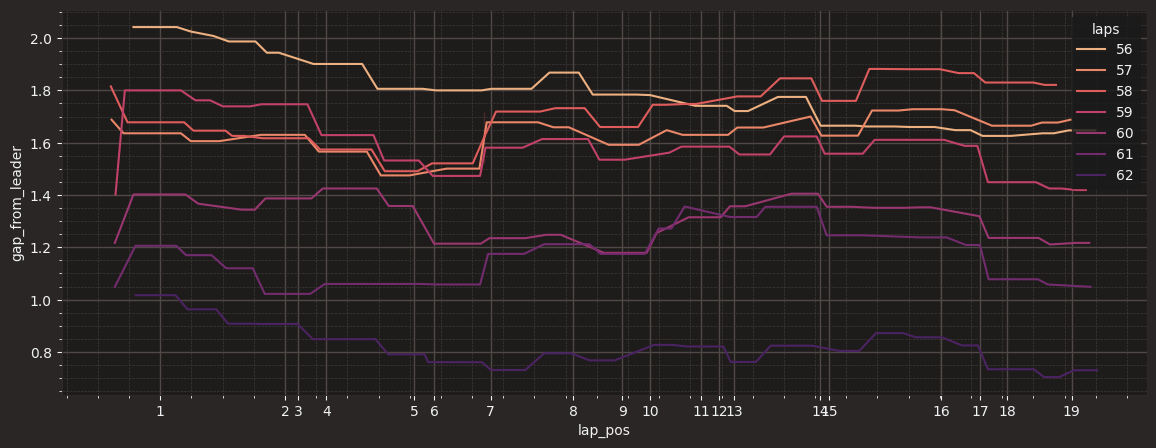

In [44]:
dfTelem['laps']=dfTelem['laps'].astype(int)
test=dfTelem[(dfTelem['abbreviation'].isin(['NOR'])) & (dfTelem['laps']>55) & (dfTelem['laps']<63)][['gap_from_leader','lap_pos','laps']]


fig,ax=plt.subplots(figsize=(14,5))

sns.lineplot(data=test,x='lap_pos',y='gap_from_leader',hue='laps',ax=ax,palette=sns.color_palette("flare", as_cmap=True))
ax.set_xticks(corners['RelDist'])
ax.set_xticklabels(corners['Number'])
plt.show()

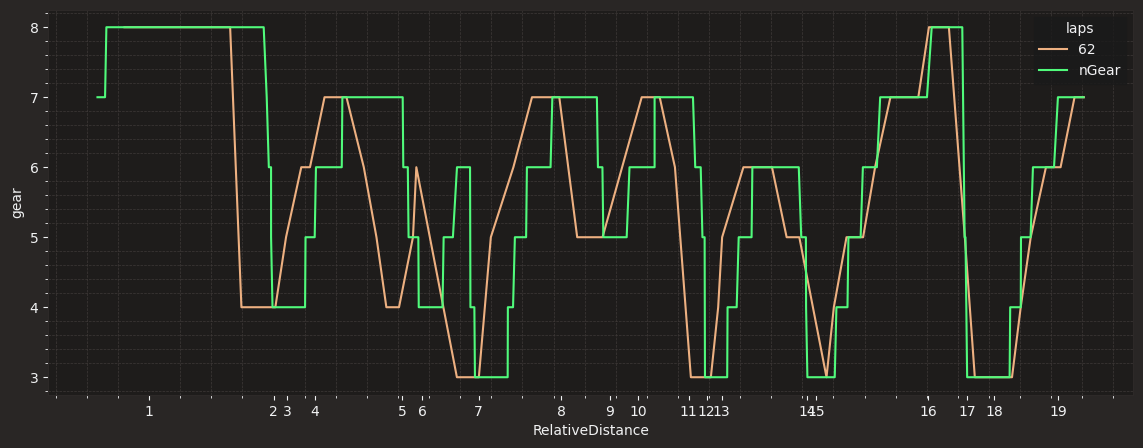

In [55]:
dfTelem['laps']=dfTelem['laps'].astype(int)
test=dfTelem[(dfTelem['abbreviation'].isin(['NOR'])) & (dfTelem['laps']==62)][['gear','lap_pos','laps']]


fig,ax=plt.subplots(figsize=(14,5))

sns.lineplot(data=test,x='lap_pos',y='gear',hue='laps',ax=ax,palette=sns.color_palette("flare", as_cmap=True))
imolagp_r.laps.pick_lap(63).pick_driver('NOR').get_telemetry().plot(y='nGear',x='RelativeDistance',ax=ax)
ax.set_xticks(corners['RelDist'])
ax.set_xticklabels(corners['Number'])
plt.show()

In [21]:


vertelem=imolagp_r.laps.pick_lap(62).pick_driver('VER')
nortelem=imolagp_r.laps.pick_lap(62).pick_driver('NOR')

fastf1.utils.delta_time(nortelem,vertelem)[0]

f:\f1analytics\.venv\lib\site-packages\fastf1\utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


0      0.000000
1      0.000278
2      0.000589
3      0.002878
4      0.004791
         ...   
302    0.177931
303    0.181568
304    0.184905
305    0.187693
306    0.189000
Name: Time, Length: 307, dtype: float64

f:\f1analytics\.venv\lib\site-packages\fastf1\utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


<Axes: >

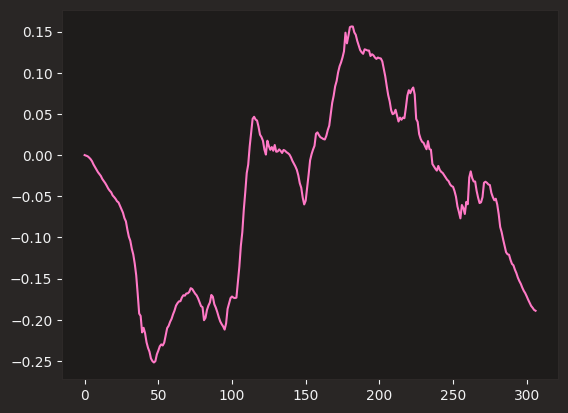

In [22]:
fastf1.utils.delta_time(vertelem,nortelem)[0].plot()